In [4]:
from pymongo import MongoClient

# Inisialisasi client dan koneksi ke database
client = MongoClient('mongodb://localhost:27017/')
db = client['company_db']
print('Connected to MongoDB')

Connected to MongoDB


In [15]:
from pymongo import MongoClient

# Koneksi ke MongoDB lokal
client = MongoClient("mongodb://localhost:27017/")

# Pilih database dan collection
db = client["company_database"]
collection = db["employees"]

# Insert satu data
employee_data = {
    'name': 'Alice',
    'department': 'Finance',
    'age': 29,
    'salary': 4500
}
collection.insert_one(employee_data)
print("1 Data inserted")

# Insert beberapa data sekaligus
many_employees = [
    {'name': 'Bob', 'department': 'IT', 'age': 32, 'salary': 5200},
    {'name': 'Charlie', 'department': 'HR', 'age': 26, 'salary': 4000},
    {'name': 'Diana', 'department': 'IT', 'age': 30, 'salary': 5800},
    {'name': 'Eve', 'department': 'Finance', 'age': 35, 'salary': 6000}
]
collection.insert_many(many_employees)
print("Multiple data inserted")

print("\n Data saat ini di collection:")
for emp in collection.find():
    print(emp)

# Update satu data: ubah gaji Bob jadi 5500
collection.update_one(
    {'name': 'Bob'},               
    {'$set': {'salary': 5500}}     
)
print("\n Data Bob berhasil diupdate!")

# Tampilkan hasil update
for emp in collection.find({'name': 'Bob'}):
    print(emp)

# Hapus satu data: hapus Charlie
collection.delete_one({'name': 'Charlie'})
print("\n Data Charlie berhasil dihapus!")

# Tampilkan hasil akhir
print("\n Data akhir setelah delete:")
for emp in collection.find():
    print(emp)


1 Data inserted
Multiple data inserted

 Data saat ini di collection:
{'_id': ObjectId('690c6ce1e525d2086d2d8551'), 'name': 'Alice', 'department': 'Finance', 'age': 29, 'salary': 4500}
{'_id': ObjectId('690c6dd2e525d2086d2d8553'), 'name': 'Alice', 'department': 'Finance', 'age': 29, 'salary': 4500}
{'_id': ObjectId('690c6dd2e525d2086d2d8554'), 'name': 'Bob', 'department': 'IT', 'age': 32, 'salary': 5500}
{'_id': ObjectId('690c6dd2e525d2086d2d8556'), 'name': 'Diana', 'department': 'IT', 'age': 30, 'salary': 5800}
{'_id': ObjectId('690c6dd2e525d2086d2d8557'), 'name': 'Eve', 'department': 'Finance', 'age': 35, 'salary': 6000}
{'_id': ObjectId('690c6e27e525d2086d2d8559'), 'name': 'Alice', 'department': 'Finance', 'age': 29, 'salary': 4500}
{'_id': ObjectId('690c6e27e525d2086d2d855a'), 'name': 'Bob', 'department': 'IT', 'age': 32, 'salary': 5200}
{'_id': ObjectId('690c6e27e525d2086d2d855c'), 'name': 'Diana', 'department': 'IT', 'age': 30, 'salary': 5800}
{'_id': ObjectId('690c6e27e525d2086d

Rata-rata gaji per departemen:
Departemen: IT, Rata-rata gaji: 5575.00
Departemen: Finance, Rata-rata gaji: 5100.00


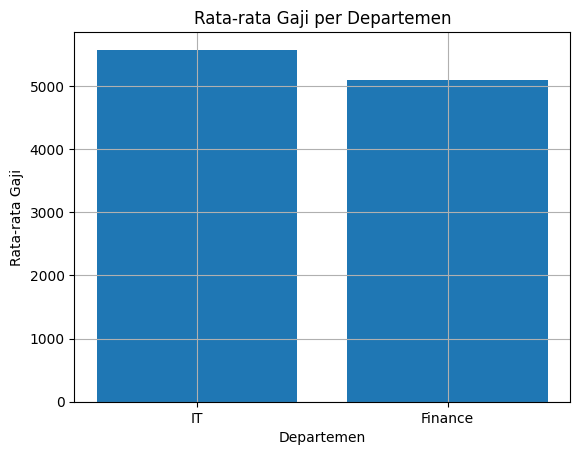

In [11]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

# Koneksi ke MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["company_database"]
collection = db["employees"]

# Aggregation Pipeline: menghitung rata-rata gaji per departemen
pipeline = [
    {
        '$group': {
            '_id': '$department',              
            'average_salary': {'$avg': '$salary'}  
        }
    },
    {
        '$sort': {'average_salary': -1}        
    }
]

# Jalankan aggregation
results = list(collection.aggregate(pipeline))

# Tampilkan hasil di terminal
print("Rata-rata gaji per departemen:")
for result in results:
    print(f"Departemen: {result['_id']}, Rata-rata gaji: {result['average_salary']:.2f}")

# (Opsional) Visualisasi hasil dalam bentuk grafik batang
df = pd.DataFrame(results)
plt.bar(df['_id'], df['average_salary'])
plt.title('Rata-rata Gaji per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Rata-rata Gaji')
plt.grid(True)
plt.show()


In [ ]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
db = client["company_database"]
collection = db["employees"]

pipeline = [
    {'$sort': {'salary': -1}},  
    {'$group': {
        '_id': '$department',
        'top_employees': {
            '$push': {
                'name': '$name',
                'salary': '$salary',
                'age': '$age'
            }
        }
    }},
    {'$project': {
        'top_5': {'$slice': ['$top_employees', 5]}  
    }}
]

results = list(collection.aggregate(pipeline))

print("5 Karyawan dengan gaji tertinggi per departemen:")
for dept in results:
    print(f"\nDepartemen: {dept['_id']}")
    for emp in dept['top_5']:
        print(f" - {emp['name']} | Gaji: {emp['salary']} | Umur: {emp['age']}")


In [12]:
# Menghapus semua karyawan dengan umur < 25
deleted = collection.delete_many({'age': {'$lt': 25}})

print(f" {deleted.deleted_count} karyawan berusia di bawah 25 tahun telah dihapus.")
print("\n Data setelah penghapusan:")
for emp in collection.find():
    print(emp)


 0 karyawan berusia di bawah 25 tahun telah dihapus.

 Data setelah penghapusan:
{'_id': ObjectId('690c6ce1e525d2086d2d8551'), 'name': 'Alice', 'department': 'Finance', 'age': 29, 'salary': 4500}
{'_id': ObjectId('690c6dd2e525d2086d2d8553'), 'name': 'Alice', 'department': 'Finance', 'age': 29, 'salary': 4500}
{'_id': ObjectId('690c6dd2e525d2086d2d8554'), 'name': 'Bob', 'department': 'IT', 'age': 32, 'salary': 5500}
{'_id': ObjectId('690c6dd2e525d2086d2d8556'), 'name': 'Diana', 'department': 'IT', 'age': 30, 'salary': 5800}
{'_id': ObjectId('690c6dd2e525d2086d2d8557'), 'name': 'Eve', 'department': 'Finance', 'age': 35, 'salary': 6000}
{'_id': ObjectId('690c6e27e525d2086d2d8559'), 'name': 'Alice', 'department': 'Finance', 'age': 29, 'salary': 4500}
{'_id': ObjectId('690c6e27e525d2086d2d855a'), 'name': 'Bob', 'department': 'IT', 'age': 32, 'salary': 5200}
{'_id': ObjectId('690c6e27e525d2086d2d855c'), 'name': 'Diana', 'department': 'IT', 'age': 30, 'salary': 5800}
{'_id': ObjectId('690c6e2

In [ ]:
pipeline = [
    {
        '$group': {
            '_id': '$department',
            'total_salary': {'$sum': '$salary'},
            'average_age': {'$avg': '$age'}
        }
    },
    {'$sort': {'total_salary': -1}}  # Urutkan dari total gaji tertinggi
]

results = list(collection.aggregate(pipeline))

print("📊 Laporan Ringkas per Departemen:")
for r in results:
    print(f"Departemen: {r['_id']}")
    print(f"  • Total Gaji: {r['total_salary']}")
    print(f"  • Rata-rata Umur: {r['average_age']:.2f}\_]()
